In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsp
from statsmodels.tsa.stattools import adfuller

# Задание на 4:

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/авр/CHMF.csv', sep=';', decimal=',').dropna()
data = data.set_index('date')
data.head()

,price
date,
03.01.2018,897.4
04.01.2018,908.0
05.01.2018,920.0
09.01.2018,939.3
10.01.2018,949.0


p-value теста Дики-Фулера = 0.39218067396223927


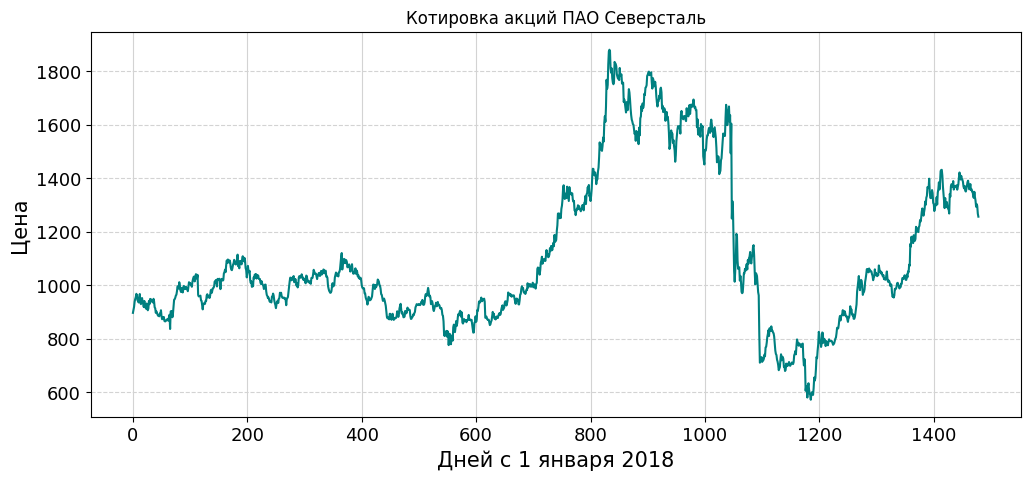

In [ ]:
plt.figure(figsize = [12, 5])

plt.plot(data.values, color='teal')

plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Цена', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Котировка акций ПАО Северсталь')

print(f'p-value теста Дики-Фулера = {adfuller(data.values)[1]}')

Данный ряд демонстрирует котировку акции ПАО Северсталь с 1 января 2018 года по 1 декабря 2023. Ряд является нестационарным в соответствии с тестом Дики-Фуллера, что можно заметить и визуально. Никакой ярко выраженной трендовой составляющей не наблюдается.

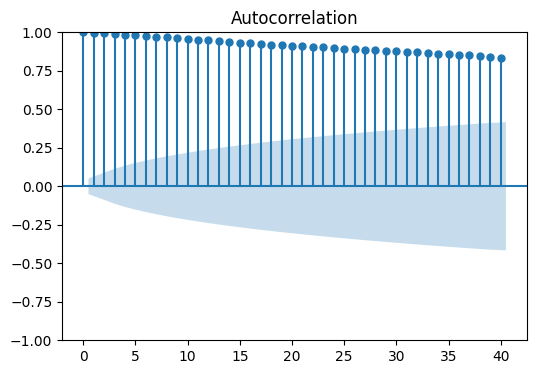

In [ ]:
mpl.rc("figure", figsize=(6,4))
tsp.plot_acf(x=data.values, lags=40, alpha=0.05)
plt.show()

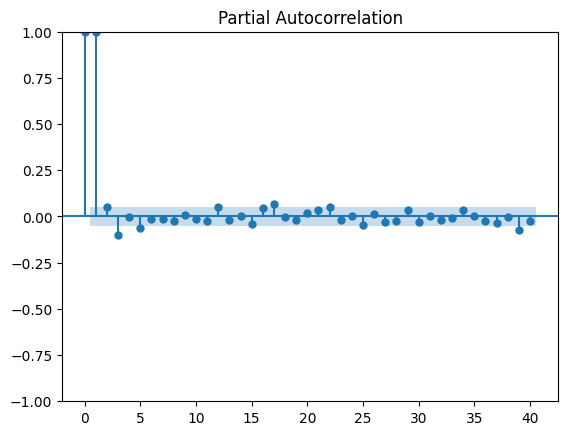

In [ ]:
tsp.plot_pacf(x=data.values, lags=40, alpha=0.05)
plt.show()

Процесс, исходя из графика частичной автокорреляции, m-коррелирован, где m либо 1, либо 3. Таким образом его можно представить в виде MA(1) или МА(3) процесса, соответственно.

Тем не менее, из экономической теории мы знаем, что в случае котировок, и в целом активов фондового рынка, нужно обращать внимание скорее на $m → ∞$-коррелированность процесса из графика ACF. Именно поэтому котировки часто представляют моделями МА($n → ∞$).

Однако, ряд нестационарен и поэтому будет использоваться ARIMA(_, 1, _).

p-value теста Дики-Фулера = 7.653570496913602e-30


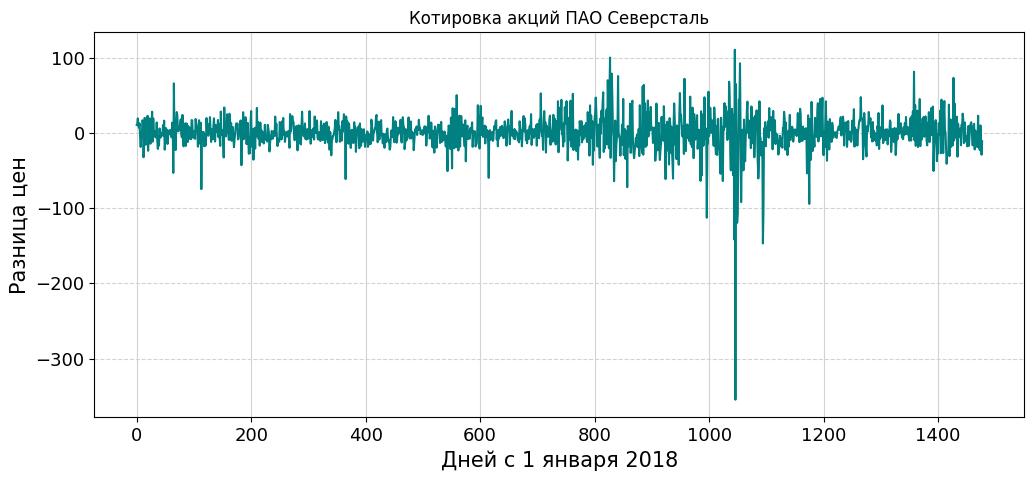

In [ ]:
lag1 = np.roll(data, 1)
lag1 = lag1[1:]
data_stat = data[1:] - lag1

plt.figure(figsize = [12, 5])

plt.plot(data_stat.values, color='teal')

plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Разница цен', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Котировка акций ПАО Северсталь')

print(f'p-value теста Дики-Фулера = {adfuller(data_stat)[1]}')

Можем видеть полностью стационарный ряд, в котором, однако, есть выбросы в районе марта 2022 года.

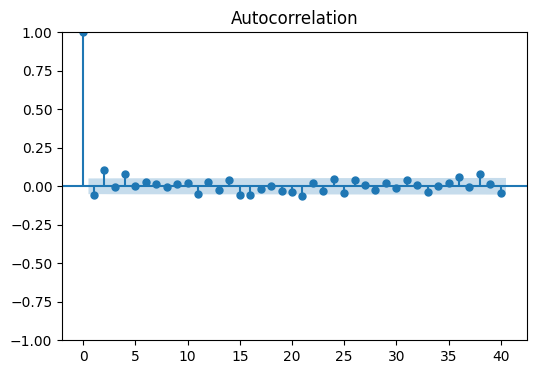

In [ ]:
mpl.rc("figure", figsize=(6,4))
tsp.plot_acf(x=data_stat, lags=40, alpha=0.05)
plt.show()

Однако в случае ряда в первых разностях за стационарность приходится заплатить m-коррелированностью.

# Задание на 5:

Теперь построим модель ARIMA на всех данных. Подобрать удалось параметры ARIMA(2, 1, 3)

In [ ]:
model = sm.tsa.ARIMA(data.values, order = (2,1,3)).fit()

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1479
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6713.854
Date:                Sat, 23 Dec 2023   AIC                          13439.707
Time:                        10:29:57   BIC                          13471.498
Sample:                             0   HQIC                         13451.559
                               - 1479                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2421      0.099     -2.456      0.014      -0.435      -0.049
ar.L2          0.6808      0.072      9.510      0.000       0.541       0.821
ma.L1          0.1907      0.103      1.843      0.0

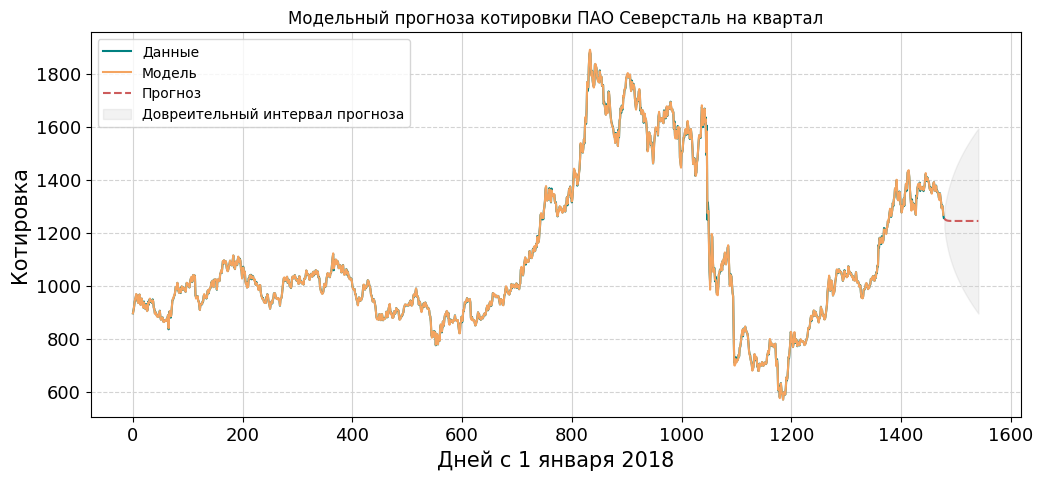

In [ ]:
pred = model.predict(start=0, end=len(data.values) - 1, typ='levels')
fc = model.get_forecast(63)
y_hat = fc.predicted_mean
conf = fc.conf_int(alpha=0.1)
lower_series = conf[:,0]
upper_series = conf[:,1]

days = np.arange(data.shape[0], data.shape[0]+63, 1)

plt.figure(figsize=[12, 5])

plt.plot(data.values, label='Данные', color='teal')
plt.plot(pred[1:], label='Модель', color='sandybrown')
plt.plot(days, y_hat, label='Прогноз', color='indianred', linestyle='--')
plt.fill_between(days, lower_series, upper_series,
                 color='grey', alpha=.1, label = 'Довреительный интервал прогноза')

plt.title('Модельный прогноза котировки ПАО Северсталь на квартал')
plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Котировка', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)

plt.legend()

In [ ]:
y_hat

array([1254.5643451 , 1252.03430737, 1250.06328808, 1248.81789664,
       1247.77744457, 1247.18141218, 1246.61732495, 1246.34807986,
       1246.02920926, 1245.92309001, 1245.7316817 , 1245.70576801,
       1245.58172414, 1245.59410955, 1245.50665822, 1245.53626065,
       1245.46955485, 1245.50585716, 1245.45165369, 1245.48949095,
       1245.4434279 , 1245.48033958, 1245.44004286, 1245.47492848,
       1245.43904812, 1245.47148523, 1245.43920441, 1245.46910312,
       1245.43988747, 1245.46731595, 1245.44078515, 1245.46588187,
       1245.44174348, 1245.46467352, 1245.44268846, 1245.46362207,
       1245.44358636, 1245.46268885, 1245.4444236 , 1245.46185081,
       1245.44519649, 1245.46109314, 1245.44590611, 1245.46040551,
       1245.4465557 , 1245.4597801 , 1245.44714936, 1245.45921059,
       1245.44769142, 1245.45869163, 1245.44818609, 1245.45821855,
       1245.4486374 , 1245.45778721, 1245.44904909, 1245.45739389,
       1245.44942459, 1245.45703519, 1245.44976708, 1245.45670

Прогноз выглядит странно, словно он константный, но чуть выше я привел набор прогнозных значений, они все таки незначительно отличаются, так что модель работает корректно, хотя, быть может, и неточно.


Теперь построим модель ARMA (0, 20) на первых 90% данных, эту выборку назовем тренировочной, качество замерим, дав прогноз остальным 10% данным, называемым тестовыми.

In [ ]:
data_train = data.iloc[:1331, 0]
data_test = data.iloc[1331:, 0]
model = sm.tsa.ARIMA(data_train.values, order = (0,0,20)).fit()

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1331
Model:                ARIMA(0, 0, 20)   Log Likelihood               -7293.916
Date:                Sat, 23 Dec 2023   AIC                          14631.832
Time:                        10:27:19   BIC                          14746.094
Sample:                             0   HQIC                         14674.653
                               - 1331                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1087.4682     35.210     30.886      0.000    1018.459    1156.478
ma.L1          1.2534      0.663      1.891      0.059      -0.046       2.553
ma.L2          1.3037      0.543      2.402      0.0

In [ ]:
fc = model.get_forecast(data.shape[0] - 1331)
y_hat = fc.predicted_mean

print('MA(20) RMSE =', np.sqrt(np.sum((data_test - y_hat) ** 2) / len(y_hat)))

MA(20) RMSE = 221.8579342668476


In [ ]:
model2 = sm.tsa.ARIMA(data_train.values, order = (2,1,3)).fit()
fc = model2.get_forecast(data.shape[0] - 1331)
y_hat = fc.predicted_mean

print('ARIMA(2, 1, 3) RMSE =', np.sqrt(np.sum((data_test - y_hat) ** 2) / len(y_hat)))

ARIMA(2, 1, 3) RMSE = 342.0379931083619


Как видим, процесс МА($n\rightarrow \infty$) лучше описывает ряд, чем стационарная в 1ой разности ARIMA модель.

# Задание на 6:

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/авр/imoex, brent.xlsx', sheet_name='daily')
df = df.set_index('date')
df.index = df.index.strftime('%d.%m.%Y')
inner = data.join(df)
inner.head()

,price,imoex,brent
date,,,
03.01.2018,897.4,2152.97,67.84
04.01.2018,908.0,2197.60,68.07
05.01.2018,920.0,2207.41,67.62
09.01.2018,939.3,2225.39,68.82
10.01.2018,949.0,2232.27,69.20


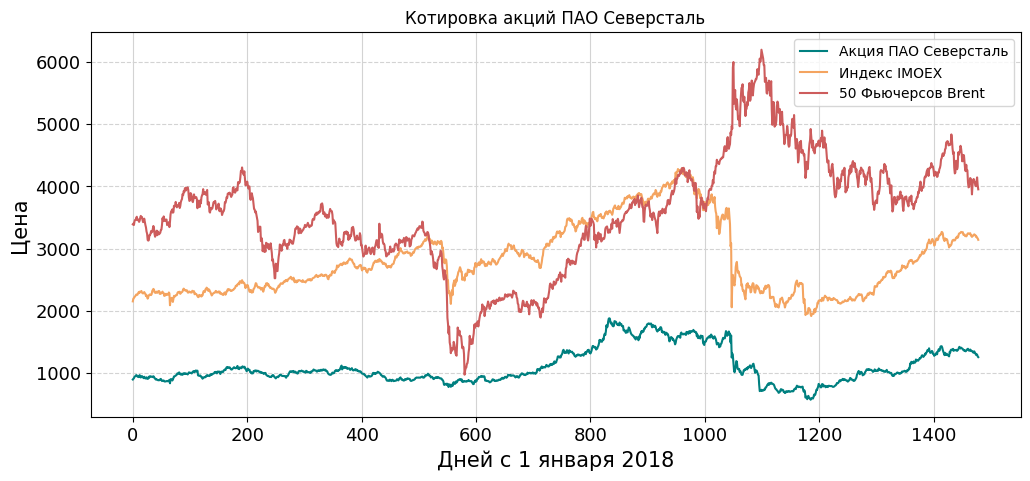

In [ ]:
plt.figure(figsize = [12, 5])

plt.plot(inner.iloc[:, 0].values, color='teal', label='Акция ПАО Северсталь')
plt.plot(inner.iloc[:, 1].values, color='sandybrown', label='Индекс IMOEX')
plt.plot(inner.iloc[:, 2].values * 50, color='indianred', label='50 Фьючерсов Brent')


plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Цена', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Котировка акций ПАО Северсталь')
plt.legend()

Сразу видим, что котировка акций северстали и индекс мосбиржы - коинтегрированы. Проверим это, попробовав составить стационарную линейную комбинацию процессов.

p-value теста Дики-Фулера = 0.033595580405567475


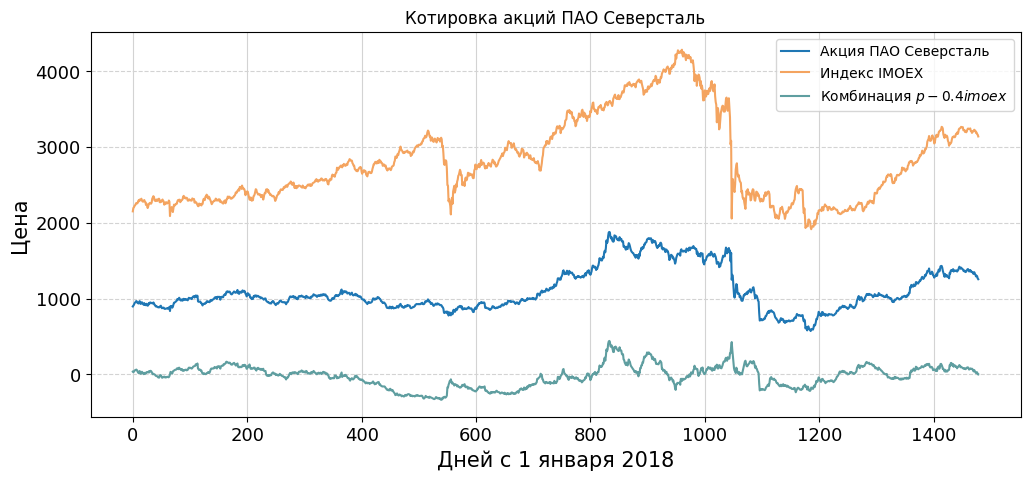

In [ ]:
datastat = inner.iloc[:, 0] - 0.4 * inner.iloc[:, 1]
plt.figure(figsize = [12, 5])

plt.plot(inner.iloc[:, 0].values, label='Акция ПАО Северсталь')
plt.plot(inner.iloc[:, 1].values, color='sandybrown', label='Индекс IMOEX')
plt.plot(datastat.values, color='cadetblue', label=r'Комбинация $p-0.4imoex$')


plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Цена', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Котировка акций ПАО Северсталь')
plt.legend()

print(f'p-value теста Дики-Фулера = {adfuller(datastat)[1]}')

Как видим, линейная комбинация стационарна, далее воспользуемся ей для построения VARMA модели.

In [ ]:
varma = pd.concat([datastat, inner['brent']], axis=1)
varma.columns = ["котировка", "brent"]

In [ ]:
model = sm.tsa.VARMAX(varma, order=(3, 0)).fit()
print(model.summary())

                             Statespace Model Results                             
Dep. Variable:     ['котировка', 'brent']   No. Observations:                 1479
Model:                             VAR(3)   Log Likelihood               -9258.379
                              + intercept   AIC                          18550.757
Date:                    Sat, 23 Dec 2023   BIC                          18640.842
Time:                            10:41:28   HQIC                         18584.341
Sample:                                 0                                         
                                   - 1479                                         
Covariance Type:                      opg                                         
Ljung-Box (L1) (Q):             0.01, 0.01   Jarque-Bera (JB):    2086.19, 12500.12
Prob(Q):                        0.94, 0.94   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         2.93, 3.36   Skew:                       0.09, 0.39
P

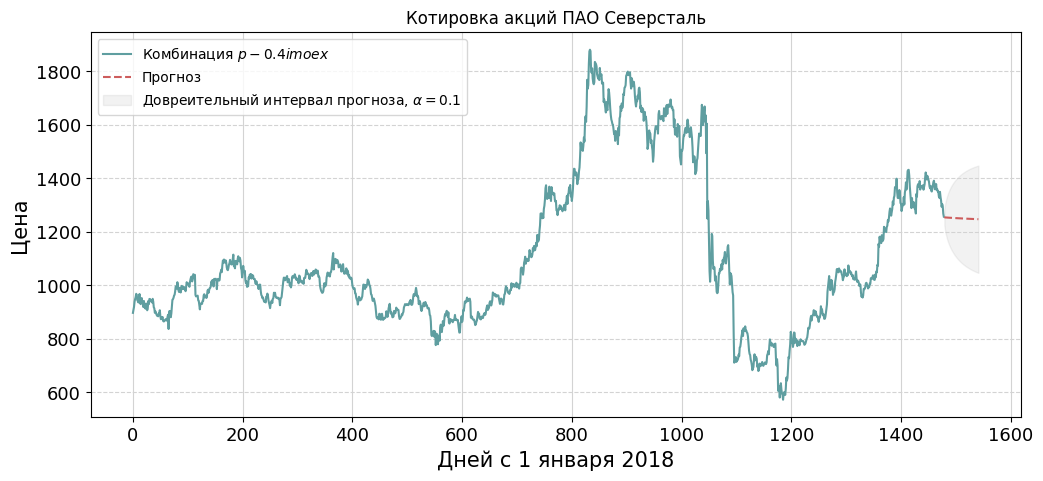

In [ ]:
fc = model.get_forecast(63)
conf = fc.conf_int(alpha=.1)
lower_series = conf.iloc[:,0] + 0.4*inner.iloc[-1, 1]
upper_series = conf.iloc[:,2] + 0.4*inner.iloc[-1, 1]
y_hat = fc.predicted_mean.iloc[:, 0] + 0.4*inner.iloc[-1, 1]

days = np.arange(varma.shape[0], varma.shape[0]+63, 1)
plt.figure(figsize=[12, 5])

plt.plot(inner.iloc[:, 0].values, color='cadetblue', label=r'Комбинация $p-0.4imoex$')
plt.plot(days, y_hat, label='Прогноз', color='indianred', linestyle='--')
plt.fill_between(days, lower_series, upper_series,
                 color='grey', alpha=.1,
                 label = r'Довреительный интервал прогноза, $\alpha = 0.1$')

plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Цена', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Котировка акций ПАО Северсталь')
plt.legend()

Попробуем также построить модель на изначальныз данных. Не мелочимся, это будет VARMA(1, 10).

In [ ]:
model = sm.tsa.VARMAX(inner, order=(1, 10)).fit()
print(model.summary())

                                Statespace Model Results                               
Dep. Variable:     ['price', 'imoex', 'brent']   No. Observations:                 1479
Model:                             VARMA(1,10)   Log Likelihood              -16856.209
                                   + intercept   AIC                          33928.417
Date:                         Sat, 23 Dec 2023   BIC                          34500.722
Time:                                 10:37:51   HQIC                         34141.772
Sample:                                      0                                         
                                        - 1479                                         
Covariance Type:                           opg                                         
Ljung-Box (L1) (Q):       0.02, 0.06, 0.00   Jarque-Bera (JB):   56160.30, 92592.26, 621.95
Prob(Q):                  0.88, 0.81, 0.99   Prob(JB):                     0.00, 0.00, 0.00
Heteroskedasticity (H): 

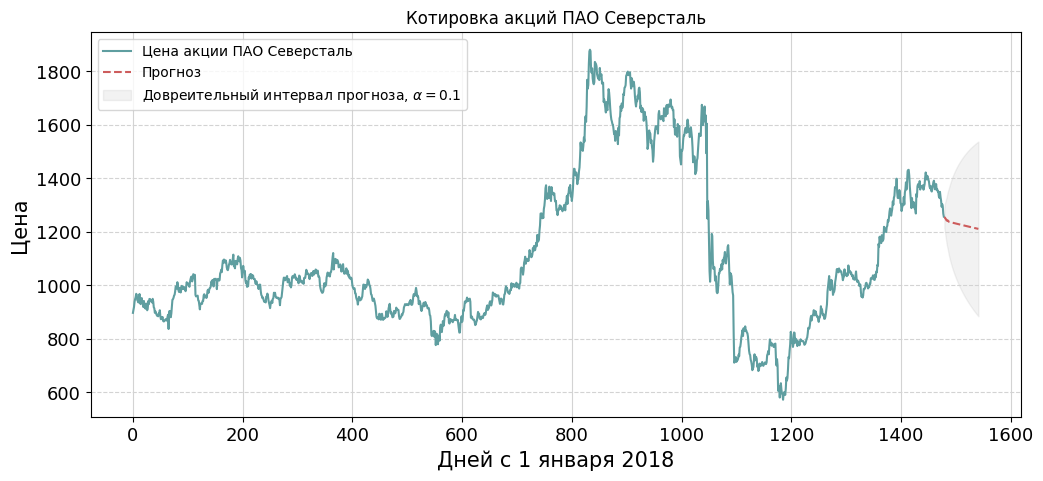

In [ ]:
fc = model.get_forecast(63)
conf = fc.conf_int(alpha=.1)
lower_series = conf.iloc[:,0]
upper_series = conf.iloc[:,3]
y_hat = fc.predicted_mean.iloc[:, 0]

days = np.arange(varma.shape[0], varma.shape[0]+63, 1)
plt.figure(figsize=[12, 5])

plt.plot(inner['price'].values, color='cadetblue', label='Цена акции ПАО Северсталь')
plt.plot(days, y_hat, label='Прогноз', color='indianred', linestyle='--')
plt.fill_between(days, lower_series, upper_series,
                 color='grey', alpha=.1,
                 label = r'Довреительный интервал прогноза, $\alpha = 0.1$')

plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Цена', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Котировка акций ПАО Северсталь')
plt.legend()

Первый прогноз дает лучшие результаты в смысле доверительного интервала, поэтому предпочтем именно эту модель.

Однако мое личное мнение: во второй модели лучше точечный прогноз, во всяком случае именно точечный прогноз это сильное место VARMA моделей с большой глубиной MA составляющей.

# Задание на 7:

Так как ряд гетероскедастичен, то представляет интерес научится предсказывать дисперсию процесса. Построим прогнозную интервальную модель. Однако, будем это делать отдельно через классический GARCH и через Realised Volatility GARCH.

Для начала достанем остатки для классического GARCH из модели ARIMA(2, 1, 3).

In [ ]:
model = sm.tsa.ARIMA(data.values, order = (2,1,3)).fit()
garch = model.resid ** 2
garch[garch > 20000] = garch.mean()

Далее, рассчитаем подневную RV дисперсию по более частотным часовым данным.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/авр/imoex, brent.xlsx', sheet_name='hourly').drop(['time'], axis=1)

rv = df.groupby(['date']).std() ** 2

In [ ]:
rv.head()

,price
date,
2018-01-03,3.994444
2018-01-04,13.695278
2018-01-05,19.965000
2018-01-09,46.936111
2018-01-10,23.145000


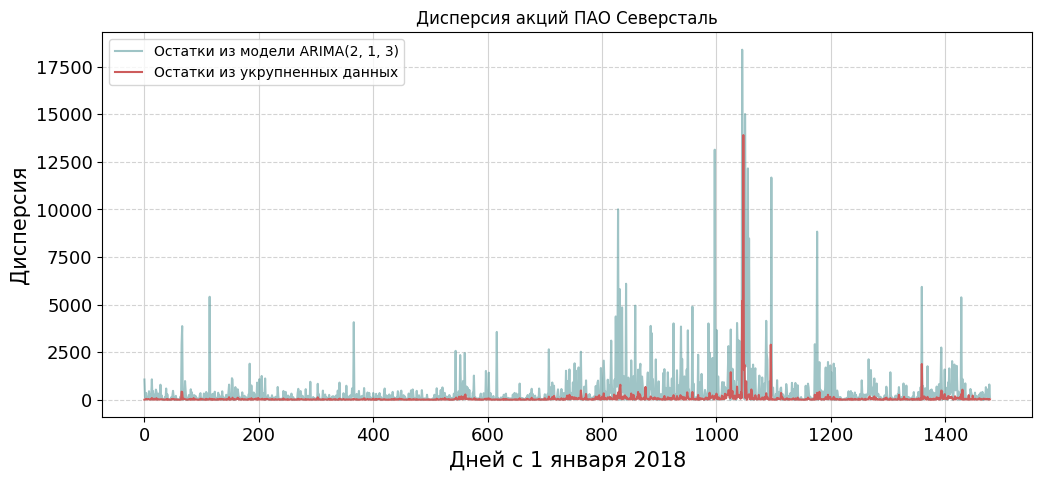

In [ ]:
plt.figure(figsize = [12, 5])

plt.plot(garch, color='cadetblue', label='Остатки из модели ARIMA(2, 1, 3)', alpha=.6)
plt.plot(rv.values, color='indianred', label='Остатки из укрупненных данных')


plt.xlabel('Дней с 1 января 2018', fontsize = 15, color='black')
plt.ylabel('Дисперсия', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Дисперсия акций ПАО Северсталь')
plt.legend()

Как видим, остатки в обоих случаях обладают одинаковой частотностью, однако у них радикально отличается магнитуды - дисперсия из модели ARIMA(2, 1, 3) всегда гораздо больше реализованных из-за плохого качества подгонки модели (что неизбежно, ведь предсказывать котировки акций считается невозможным).

In [ ]:
model = sm.tsa.ARIMA(garch, order = (3, 0, 1)).fit()
model2 = sm.tsa.ARIMA(garch, order = (5, 0, 0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1479
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -12458.043
Date:                Sat, 23 Dec 2023   AIC                          24928.085
Time:                        10:50:54   BIC                          24959.880
Sample:                             0   HQIC                         24939.938
                               - 1479                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        428.9486    177.952      2.410      0.016      80.169     777.728
ar.L1          0.8737      0.023     38.027      0.000       0.829       0.919
ar.L2         -0.0334      0.017     -1.950      0.0

In [ ]:
rv_model = sm.tsa.ARIMA(rv.values, order = (3, 0, 1)).fit()
rv_model2 = sm.tsa.ARIMA(rv.values, order = (5, 0, 0)).fit()
print(rv_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1479
Model:                 ARIMA(3, 0, 1)   Log Likelihood              -10830.431
Date:                Sat, 23 Dec 2023   AIC                          21672.863
Time:                        10:50:57   BIC                          21704.657
Sample:                             0   HQIC                         21684.716
                               - 1479                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.4285     45.937      1.468      0.142     -22.607     157.464
ar.L1          0.4201      0.146      2.886      0.004       0.135       0.705
ar.L2          0.3552      0.026     13.582      0.0

In [ ]:
fc = model.get_forecast(63)
conf = fc.conf_int(alpha=.1)
lower_series1 = conf[:,0]
upper_series1 = conf[:,1]

fc = model2.get_forecast(63)
conf = fc.conf_int(alpha=.1)
lower_series2 = conf[:,0]
upper_series2 = conf[:,1]

fc = rv_model.get_forecast(63)
conf = fc.conf_int(alpha=.1)
lower_series_rv = conf[:,0]
upper_series_rv = conf[:,1]

fc = rv_model2.get_forecast(63)
conf = fc.conf_int(alpha=.1)
lower_series_rv2 = conf[:,0]
upper_series_rv2 = conf[:,1]

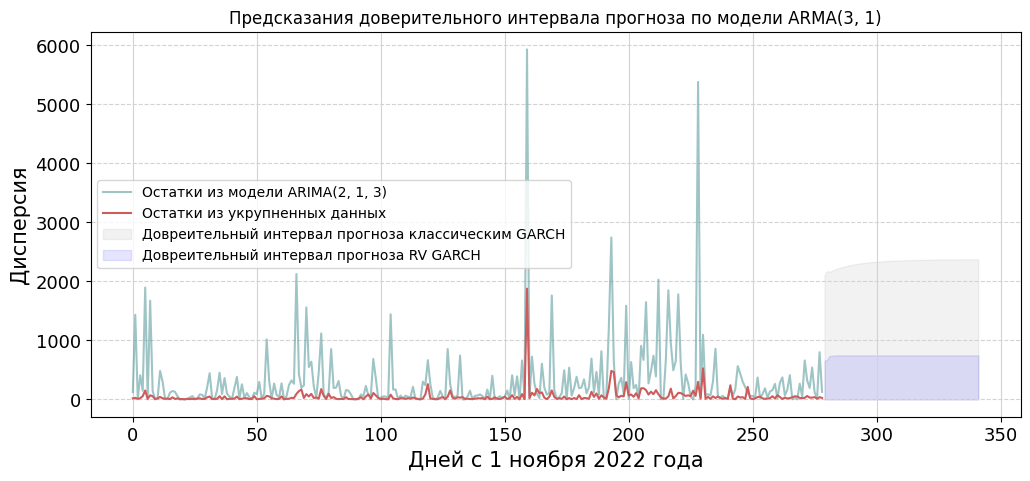

In [ ]:
days = np.arange(garch[1200:].shape[0], garch[1200:].shape[0]+63, 1)
plt.figure(figsize=[12, 5])

plt.plot(garch[1200:], color='cadetblue', label='Остатки из модели ARIMA(2, 1, 3)', alpha=.6)
plt.plot(rv.iloc[1200:, 0].values, color='indianred', label='Остатки из укрупненных данных')

plt.fill_between(days, np.zeros(days.shape), upper_series1,
                 color='grey', alpha=.1,
                 label = r'Довреительный интервал прогноза классическим GARCH')
plt.fill_between(days, np.zeros(days.shape), upper_series_rv,
                 color='blue', alpha=.1,
                 label = r'Довреительный интервал прогноза RV GARCH')

plt.xlabel('Дней с 1 ноября 2022 года', fontsize = 15, color='black')
plt.ylabel('Дисперсия', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Предсказания доверительного интервала прогноза по модели ARMA(3, 1)')
plt.legend()

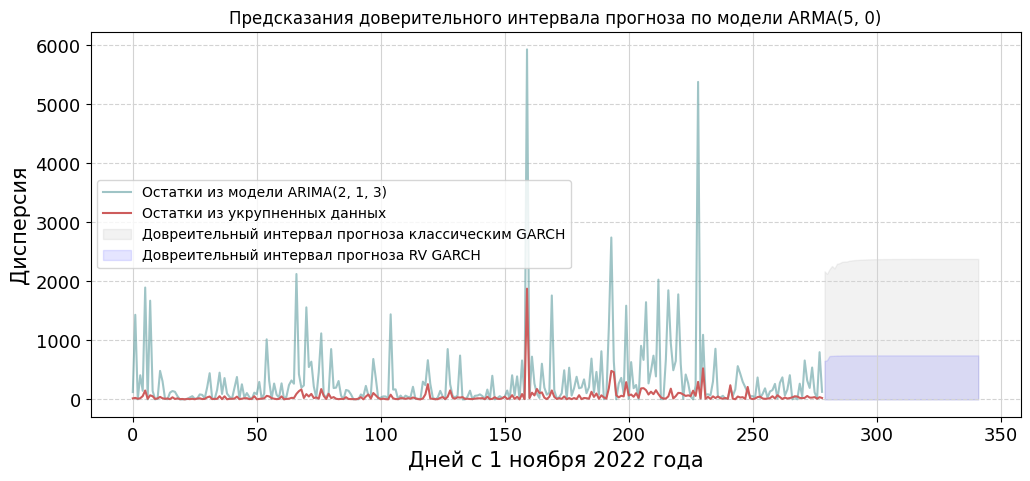

In [ ]:
days = np.arange(garch[1200:].shape[0], garch[1200:].shape[0]+63, 1)
plt.figure(figsize=[12, 5])

plt.plot(garch[1200:], color='cadetblue', label='Остатки из модели ARIMA(2, 1, 3)', alpha=.6)
plt.plot(rv.iloc[1200:, 0].values, color='indianred', label='Остатки из укрупненных данных')

plt.fill_between(days, np.zeros(days.shape), upper_series2,
                 color='grey', alpha=.1,
                 label = r'Довреительный интервал прогноза классическим GARCH')
plt.fill_between(days, np.zeros(days.shape), upper_series_rv2,
                 color='blue', alpha=.1,
                 label = r'Довреительный интервал прогноза RV GARCH')

plt.xlabel('Дней с 1 ноября 2022 года', fontsize = 15, color='black')
plt.ylabel('Дисперсия', fontsize = 15, color='black')
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.title('Предсказания доверительного интервала прогноза по модели ARMA(5, 0)')
plt.legend()

Из-за изначально значительно меньшего разброса ряда RV дисперссии цен акций, доверитаельный интервал из модели, построенной по этим данным, гораздо меньше доверительного интервала из модели GARCH.

Построим IRF, чтобы понять как модели GARCH влияют на собственные шоки, то есть на шоки $\sigma_t$

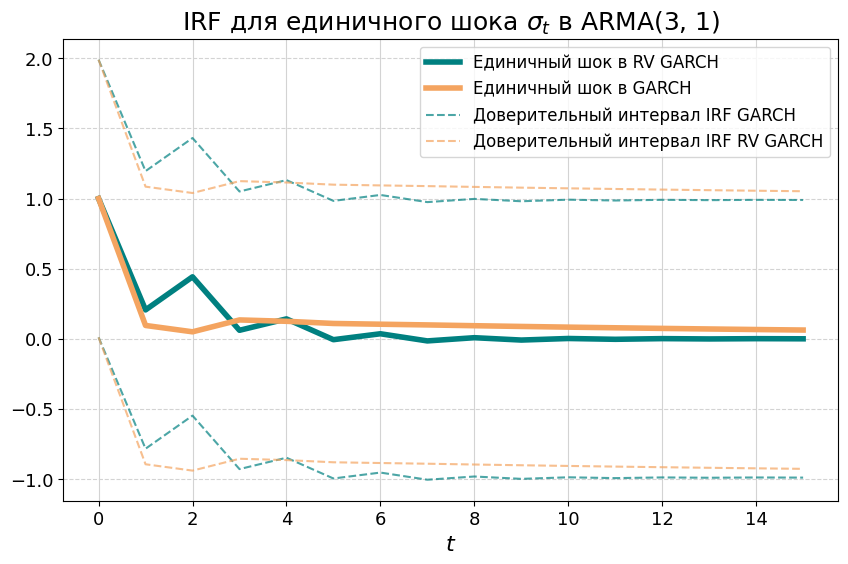

In [ ]:
nlags = 15
irf = model.impulse_responses(nlags, 0)
t_st = 1.98
std = np.sqrt(model.scale)/2
lower_b = irf - t_st * std
upper_b = irf + t_st * std

irf_rv = rv_model.impulse_responses(nlags, 0)
std_rv = np.sqrt(rv_model.scale)/2
lower_b_rv = irf_rv - t_st * std_rv
upper_b_rv = irf_rv + t_st * std_rv

plt.figure(figsize=(10,6))


plt.plot(irf_rv, color='teal', label='Единичный шок в RV GARCH', linewidth=4)
plt.plot(irf, color='sandybrown', label='Единичный шок в GARCH', linewidth=4)

plt.plot(lower_b_rv, color='teal', linestyle='--', alpha=0.7, label = 'Доверительный интервал IRF GARCH' )
plt.plot(upper_b_rv, color='teal', linestyle='--', alpha=0.7)
plt.plot(lower_b, color='sandybrown', linestyle='--', alpha=0.7, label = 'Доверительный интервал IRF RV GARCH' )
plt.plot(upper_b, color='sandybrown', linestyle='--', alpha=0.7)

plt.title('IRF для единичного шока $\sigma_{t}$ в ARMA(3, 1)', size=18)
plt.xlabel('$t$', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.legend(fontsize=12)

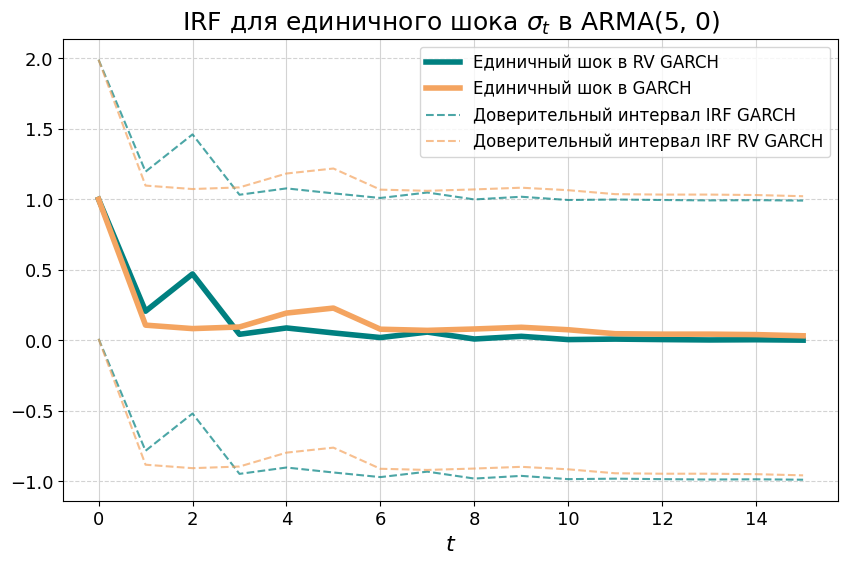

In [ ]:
nlags = 15
irf = model2.impulse_responses(nlags, 0)
t_st = 1.98
std = np.sqrt(model2.scale)/2
lower_b = irf - t_st * std
upper_b = irf + t_st * std

irf_rv = rv_model2.impulse_responses(nlags, 0)
std_rv = np.sqrt(rv_model2.scale)/2
lower_b_rv = irf_rv - t_st * std_rv
upper_b_rv = irf_rv + t_st * std_rv

plt.figure(figsize=(10,6))


plt.plot(irf_rv, color='teal', label='Единичный шок в RV GARCH', linewidth=4)
plt.plot(irf, color='sandybrown', label='Единичный шок в GARCH', linewidth=4)

plt.plot(lower_b_rv, color='teal', linestyle='--', alpha=0.7, label = 'Доверительный интервал IRF GARCH' )
plt.plot(upper_b_rv, color='teal', linestyle='--', alpha=0.7)
plt.plot(lower_b, color='sandybrown', linestyle='--', alpha=0.7, label = 'Доверительный интервал IRF RV GARCH' )
plt.plot(upper_b, color='sandybrown', linestyle='--', alpha=0.7)

plt.title('IRF для единичного шока $\sigma_{t}$ в ARMA(5, 0)', size=18)
plt.xlabel('$t$', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)
plt.legend(fontsize=12)

Отклик на шок характеризуется очень быстрым затуханием, как следствие того, что мы работаем с рядом отклонений, эффекты в которых не задерживаются.

# Задание на 8:

Функция SVAR в библиотеке statsmodels очень давно не обновлялась, многие ее методы и аттрибуты попросту не работают. Так что весь присутствующий код будет с налетом неизбежной халтуры.

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/авр/imoex, brent.xlsx', sheet_name='daily')
df_1 = pd.read_excel('/content/drive/MyDrive/авр/imoex, brent.xlsx', sheet_name='exch_rate')
df = df.set_index('date')
df_1 = df_1.set_index('date')
df.index = df.index.strftime('%d.%m.%Y')
df_1.index = df_1.index.strftime('%d.%m.%Y')

SVAR likelyhood никак не мог сойтись (то есть максимизироваться) на обычных данных, поэтому будут взяты их первые разности.

In [ ]:
inner = data.join(df)
svar_data = inner.join(df_1)
svar_data = svar_data.dropna()
lag1 = np.roll(svar_data, 1, axis=0)
lag1 = lag1[1:]
svar_data = svar_data[1:] - lag1
svar_data = svar_data[['brent', 'usd', 'imoex', 'price']]
svar_data.head()

,brent,usd,imoex,price
date,,,,
04.01.2018,0.23,0.0000,44.63,10.6
05.01.2018,-0.45,0.0000,9.81,12.0
09.01.2018,1.20,0.0000,17.98,19.3
10.01.2018,0.38,-0.5539,6.88,9.7
11.01.2018,0.06,-0.1729,14.18,6.9


В соответствии с (Hamilton, 1994) идентификационные матрицы матрицы A и B
берутся из уравнения.
$$
\log{L} = - \frac{Tn}{2}\log(2π) + \frac{T}{2}\log|A|^2 - \frac{T}{2}\ln|B|^2 - \frac{T}{2}trace(A'B'^{-1}B^{-1}A\Sigma_u)
$$

После разложения Халецкого они примут вид:


In [ ]:
A = np.array([['E', 0, 0, 0],
              [0, 'E', 0, 0],
              [0, 0, 'E', 0],
              [0, 0, 0, 'E']])

B = np.array([['E', 0, 0, 0],
              [0, 'E', 0, 0],
              [0, 0, 'E', 0],
              [0, 0, 0, 'E']])

Рассчитаем неизвестные параметры на главной диагонали

In [ ]:
svar_one = sm.tsa.SVAR(svar_data.values,
                       svar_type = "AB", A = A, B = B
                       ).fit(solver='bfgs', maxlags=15, maxiter=10000,
                             maxfun=10000)

print(svar_one)
print(svar_one.A)
print(svar_one.B)

VAR(15) process for 4-dimensional response y_t
stable: True
mean: [0.00692809 0.02278139 0.5878243  0.26384115]
[[-0.1417498   0.          0.          0.        ]
 [ 0.          0.80549557  0.          0.        ]
 [ 0.          0.          0.01793622  0.        ]
 [ 0.          0.          0.         -0.13197502]]
[[-0.22678061  0.          0.          0.        ]
 [ 0.          0.62912127  0.          0.        ]
 [ 0.          0.          0.83531872  0.        ]
 [ 0.          0.          0.          2.96056677]]


К сожалению методы прогноза в реализации SVAR в питоне не работают, но зато работают IRFы! 🤕

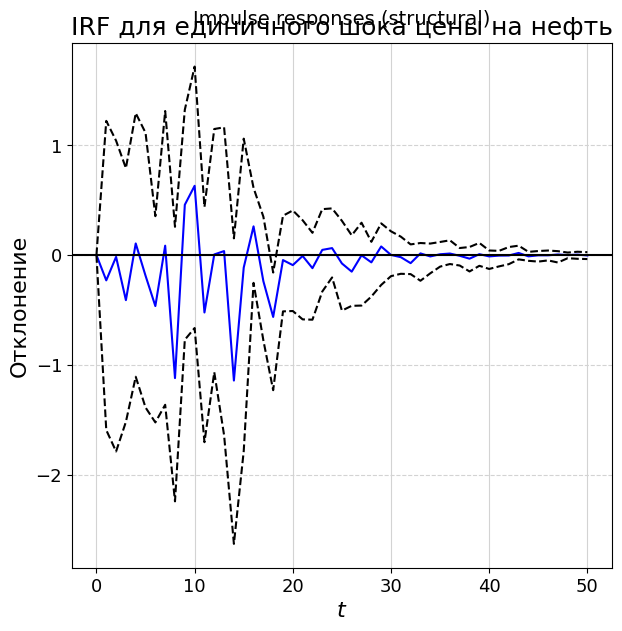

In [ ]:
import warnings
warnings.filterwarnings('ignore')

svar_one.irf(50).plot(impulse=0, response=3, stderr_type="mc", repl=50, seed=None, figsize=(6, 6))

plt.title('IRF для единичного шока цены на нефть', size=18)
plt.xlabel('$t$', size=16)
plt.ylabel('Отклонение', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)

plt.show()

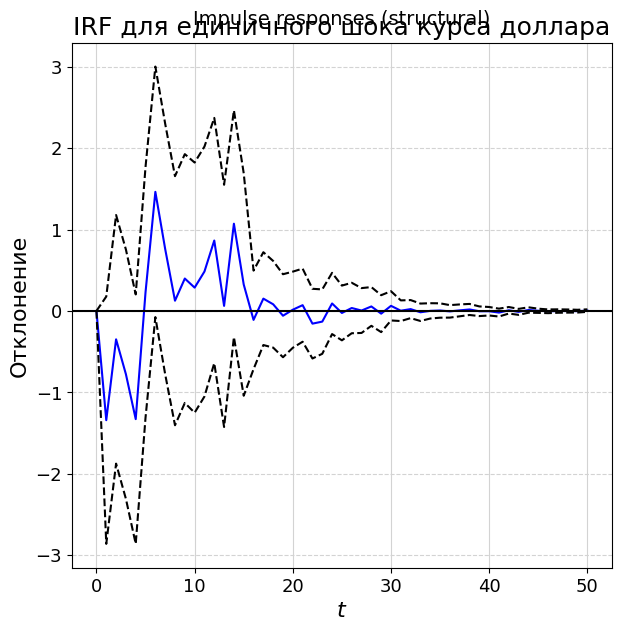

In [ ]:
svar_one.irf(50).plot(impulse=1, response=3, stderr_type="asym", repl=50, seed=None, figsize=(6, 6))

plt.title('IRF для единичного шока курса доллара', size=18)
plt.xlabel('$t$', size=16)
plt.ylabel('Отклонение', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)

plt.show()

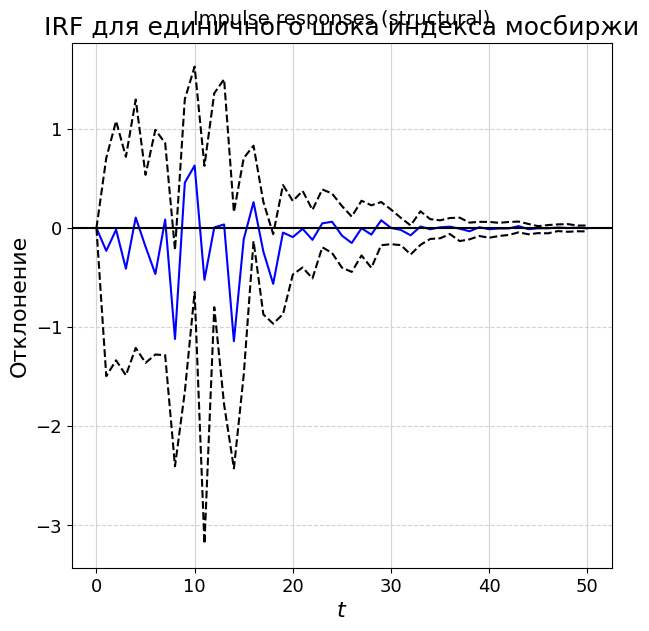

In [ ]:
svar_one.irf(50).plot(impulse=0, response=3, stderr_type="mc", repl=50, seed=None, figsize=(6, 6))

plt.title('IRF для единичного шока индекса мосбиржи', size=18)
plt.xlabel('$t$', size=16)
plt.ylabel('Отклонение', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)

plt.show()

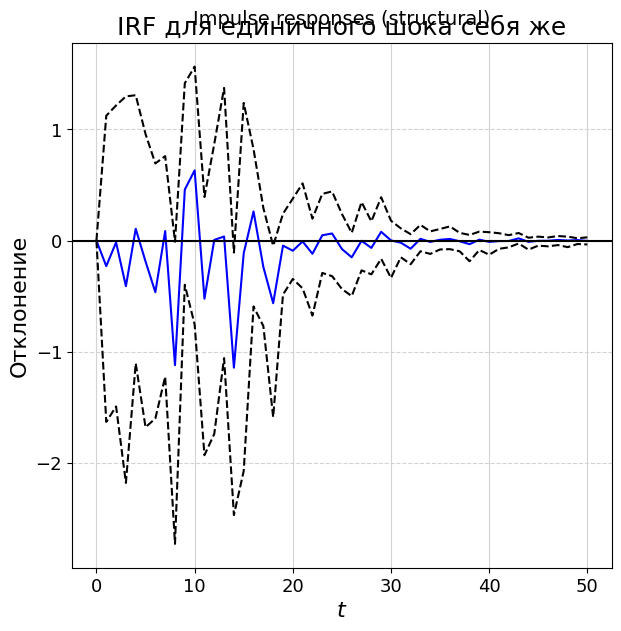

In [ ]:
svar_one.irf(50).plot(impulse=0, response=3, stderr_type="mc", repl=50, seed=None, figsize=(6, 6))

plt.title('IRF для единичного шока себя же', size=18)
plt.xlabel('$t$', size=16)
plt.ylabel('Отклонение', size=16)
plt.grid(axis ='x', which='major', linestyle='-', color='lightgrey')
plt.grid(axis ='y', which='major', linestyle='--', color='lightgrey')
plt.tick_params(axis='x', labelsize=13, color='black')
plt.tick_params(axis='y', labelsize=13)

plt.show()

Доли объясненной шоками дисперсии акции ПАО Северсталь приведены ниже.

In [ ]:
one_int = svar_one.irf(50)
stock_var = np.var(svar_data["price"])
shares_dic = {'brent': np.var(one_int.svar_irfs[:, -1, 0]) / stock_var,
              'usd': np.var(one_int.svar_irfs[:, -1, 1]) / stock_var,
              'imoex': np.var(one_int.svar_irfs[:, -1, 2]) / stock_var,
              'price': np.var(one_int.svar_irfs[:, -1, 3]) / stock_var}
shares_df = pd.DataFrame(shares_dic, index=[f'Доля объясненной дисперсии'])
shares_df

,brent,usd,imoex,price
Доля объясненной дисперсии,0.000155,0.000355,0.001195,0.019038


В целом, шоковая модель SVAR не очень подходит для работы с процессом котировок акций, так как значения доли объясненной дисперсии крайне малы.